# **Career Trends Explorer and Personalized Job Matcher**

## **Objective**:
The project aims to provide a deep understanding of workforce trends and deliver a personalized job recommendation system. By analyzing job market data, the platform will identify high-demand roles, uncover salary patterns, highlight emerging job categories, and provide job seekers with tailored opportunities that align with their preferences and market needs.

## **Situational Overview:**
The job market is dynamic, influenced by technological disruptions, economic cycles, and evolving work preferences such as remote jobs. This project will leverage advanced data analytics and predictive modeling to uncover valuable insights, empowering both job seekers and recruiters to make informed, strategic decisions. By combining historical and live job posting data, the platform will act as a one-stop tool for career trends exploration and personalized job recommendations.

 **Load the Dataset**

In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from wordcloud import WordCloud
from collections import Counter
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import streamlit as st
import pickle
import mlflow


nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt_tab') # Download the punkt_tab resource
nltk.download('stopwords')
from sklearn.feature_extraction.text import TfidfVectorizer


[nltk_data] Downloading package punkt to C:\Users\91860/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\91860/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\91860/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\91860/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91860/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [181]:
# Load the dataset
data = pd.read_csv('C:\data science material\project_8\data.csv')

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\91860\AppData\Local\Temp\ipykernel_10568\2037504552.py:2: SyntaxWarning: invalid escape sequence '\d'
  data = pd.read_csv('C:\data science material\project_8\data.csv')


In [182]:
#first five rows
data.head()

,title,link,published_date,is_hourly,hourly_low,hourly_high,budget,country
0,Experienced Media Buyer For Solar Pannel and R...,https://www.upwork.com/jobs/Experienced-Media-...,2024-02-17 09:09:54+00:00,False,NaN,NaN,500.0,NaN
1,Full Stack Developer,https://www.upwork.com/jobs/Full-Stack-Develop...,2024-02-17 09:09:17+00:00,False,NaN,NaN,1100.0,United States
2,SMMA Bubble App,https://www.upwork.com/jobs/SMMA-Bubble-App_%7...,2024-02-17 09:08:46+00:00,True,10.0,30.0,NaN,United States
3,Talent Hunter Specialized in Marketing,https://www.upwork.com/jobs/Talent-Hunter-Spec...,2024-02-17 09:08:08+00:00,True,NaN,NaN,NaN,United States
4,Data Engineer,https://www.upwork.com/jobs/Data-Engineer_%7E0...,2024-02-17 09:07:42+00:00,False,NaN,NaN,650.0,India


In [183]:
# Check basic information about the dataset
print("\nDataset Info:")
data.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244828 entries, 0 to 244827
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   title           244827 non-null  object 
 1   link            244827 non-null  object 
 2   published_date  244828 non-null  object 
 3   is_hourly       244828 non-null  bool   
 4   hourly_low      102422 non-null  float64
 5   hourly_high     98775 non-null   float64
 6   budget          103891 non-null  float64
 7   country         239751 non-null  object 
dtypes: bool(1), float64(3), object(4)
memory usage: 13.3+ MB


**Handle Missing Values**

In [184]:
# Display the number of missing values in each column
print("\nMissing Values Per Column:")
data.isnull().sum()


Missing Values Per Column:


title                  1
link                   1
published_date         0
is_hourly              0
hourly_low        142406
hourly_high       146053
budget            140937
country             5077
dtype: int64

In [185]:
# Fill missing hourly values with the median
data['hourly_low'] = data['hourly_low'].fillna(data['hourly_low'].median())
data['hourly_high'] = data['hourly_high'].fillna(data['hourly_high'].median())

Missing hourly rates are replaced by their median values to avoid skewing the data.

In [186]:
# Calculate the budget: for hourly jobs, use the average of `hourly_low` and `hourly_high`
data['budget'] = np.where(data['is_hourly'], (data['hourly_low'] + data['hourly_high']) / 2, data['budget'])

In [187]:
data.dropna(inplace=True)

In [188]:
# Handle missing country values: Fill with 'Unknown'
data['country'] = data['country'].fillna('Unknown')

# Check and display the result after handling missing values
print("Result after handling missing values:\n")
data[['hourly_low', 'hourly_high', 'budget', 'country']]

Result after handling missing values:



,hourly_low,hourly_high,budget,country
1,15.0,30.0,1100.0,United States
2,10.0,30.0,20.0,United States
3,15.0,30.0,22.5,United States
4,15.0,30.0,650.0,India
5,15.0,30.0,22.5,Portugal
...,...,...,...,...
244823,20.0,100.0,60.0,Zambia
244824,15.0,30.0,100.0,Sri Lanka
244825,5.0,30.0,17.5,United States
244826,15.0,30.0,15.0,France


In [189]:
data.isnull().sum()

title             0
link              0
published_date    0
is_hourly         0
hourly_low        0
hourly_high       0
budget            0
country           0
dtype: int64

In [190]:
# Check duplicates
data.duplicated().sum()

0

In [191]:
def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters and numbers
    text = re.sub(r'[^a-z\s]', '', text)
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    # Tokenize the text
    words = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in words if word not in stop_words]
    # Join the cleaned words back into a string
    return ' '.join(filtered_words)

**Apply Cleaning Function**

In [192]:
# Apply the cleaning function
data['Cleaned Job Title'] = data['title'].apply(clean_text)

# Preview the cleaned job titles
data[['title', 'Cleaned Job Title']].head()


,title,Cleaned Job Title
1,Full Stack Developer,full stack developer
2,SMMA Bubble App,smma bubble app
3,Talent Hunter Specialized in Marketing,talent hunter specialized marketing
4,Data Engineer,data engineer
5,SEO for Portuguese Psychologist site,seo portuguese psychologist site


**Keyword Analysis**

In [193]:
# Tokenize and count keywords
keywords = data['Cleaned Job Title'].str.split().explode()
keyword_counts = Counter(keywords)




In [194]:
# Display the 20 most common keywords
top_keywords = keyword_counts.most_common(20)
top_keywords

[('needed', 17190),
 ('website', 16340),
 ('developer', 15368),
 ('expert', 14562),
 ('video', 13523),
 ('design', 12722),
 ('designer', 12355),
 ('need', 10008),
 ('amp', 9067),
 ('specialist', 8753),
 ('looking', 8540),
 ('marketing', 8082),
 ('media', 8036),
 ('app', 7924),
 ('editor', 7601),
 ('youtube', 7438),
 ('social', 7397),
 ('data', 6912),
 ('create', 6695),
 ('content', 6598)]

**Visualization: Top Keywords**

C:\Users\91860\AppData\Local\Temp\ipykernel_10568\3966654005.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Keyword', data=keyword_df, palette='viridis')


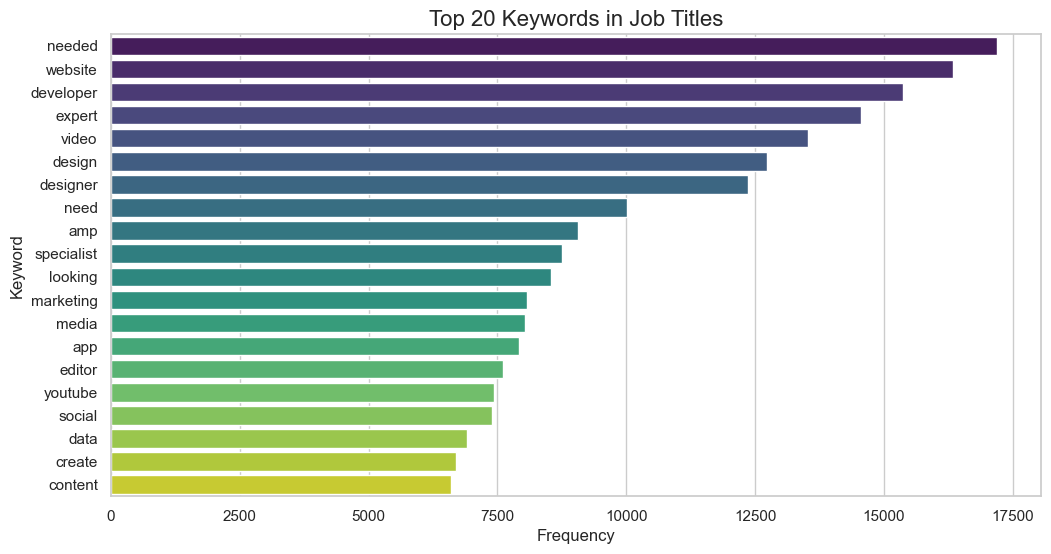

In [195]:
# Convert to DataFrame for visualization
keyword_df = pd.DataFrame(top_keywords, columns=['Keyword', 'Frequency'])

# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='Frequency', y='Keyword', data=keyword_df, palette='viridis')
plt.title('Top 20 Keywords in Job Titles', fontsize=16)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Keyword', fontsize=12)
plt.show()


- **High-Demand Keywords**: "needed," "website," and "developer" are most frequent, highlighting high-demand roles.  
- **Technical and Creative Skills**: Keywords like "developer," "design," and "video" show focus on tech and creative fields.  
- **Content and Marketing**: Words such as "content," "marketing," and "social" emphasize digital marketing and content creation.  
- **Specialized Roles**: Terms like "expert" and "specialist" suggest growing demand for niche expertise.  


**TF-IDF Analysis**

In [196]:
# Initialize the TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=100)
tfidf_matrix = vectorizer.fit_transform(data['Cleaned Job Title'])

# Create a DataFrame of TF-IDF scores
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Summarize TF-IDF scores
tfidf_scores = tfidf_df.sum(axis=0).sort_values(ascending=False)

# Display the top 20 TF-IDF keywords
print("Top 20 Keywords by TF-IDF Scores:")
tfidf_scores.head(20)


Top 20 Keywords by TF-IDF Scores:


website       9561.376646
needed        9232.149138
developer     9098.981493
expert        8441.721731
design        8077.363242
video         7483.058589
designer      7446.707484
need          6318.385341
specialist    5372.418057
looking       5212.386698
amp           4957.190878
app           4862.885933
marketing     4604.903151
editor        4466.100708
data          4396.350336
create        4338.694123
youtube       4270.050669
wordpress     4156.985210
media         4128.054304
assistant     4078.014542
dtype: float64

**Visualization: TF-IDF Scores**

C:\Users\91860\AppData\Local\Temp\ipykernel_10568\453217225.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TF-IDF Score', y='Keyword', data=tfidf_keyword_df, palette='plasma')


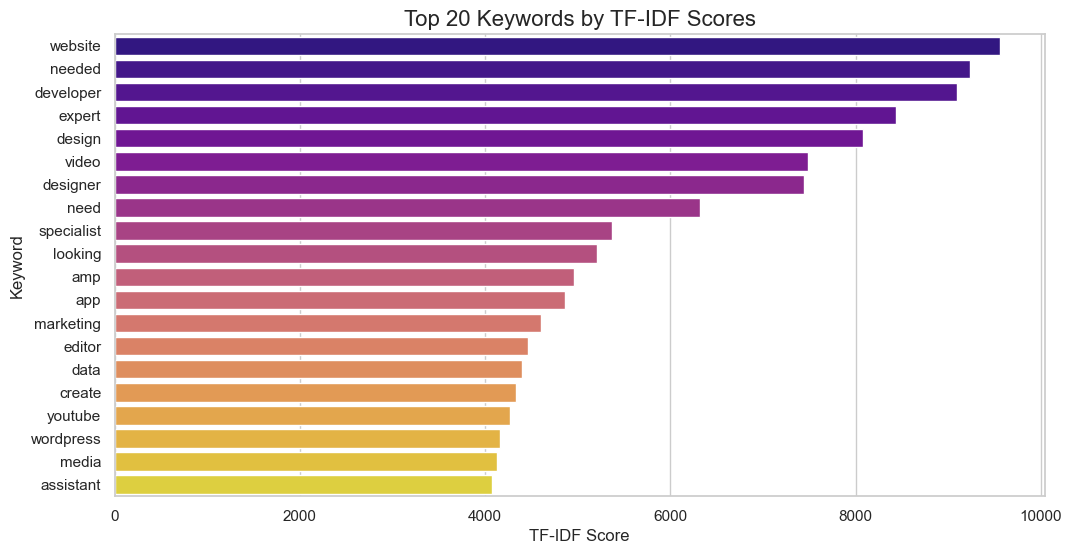

In [197]:
# Convert to DataFrame for visualization
tfidf_keyword_df = tfidf_scores.head(20).reset_index()
tfidf_keyword_df.columns = ['Keyword', 'TF-IDF Score']

# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='TF-IDF Score', y='Keyword', data=tfidf_keyword_df, palette='plasma')
plt.title('Top 20 Keywords by TF-IDF Scores', fontsize=16)
plt.xlabel('TF-IDF Score', fontsize=12)
plt.ylabel('Keyword', fontsize=12)
plt.show()


- **High TF-IDF Scores**: "Website" and "needed" rank highest, reflecting their specificity in job titles.  
- **Technical Skills**: Keywords like "developer," "design," and "video" emphasize demand for tech and creative roles.  
- **Specialized Expertise**: Terms such as "specialist" and "expert" highlight a need for niche professionals.  
- **Content and Marketing**: Words like "marketing," "YouTube," and "WordPress" show focus on digital content creation.  


In [198]:
data.columns

Index(['title', 'link', 'published_date', 'is_hourly', 'hourly_low',
       'hourly_high', 'budget', 'country', 'Cleaned Job Title'],
      dtype='object')

In [199]:
# Use the average of hourly_low and hourly_high for hourly jobs; use budget for fixed-price jobs
data['salary'] = np.where(data['is_hourly'],
                          (data['hourly_low'] + data['hourly_high']) / 2,
                          data['budget'])

In [200]:
data['salary']

1         1100.0
2           20.0
3           22.5
4          650.0
5           22.5
           ...  
244823      60.0
244824     100.0
244825      17.5
244826      15.0
244827      50.0
Name: salary, Length: 239751, dtype: float64

# **Task 1: Analyzing Keywords and Salaries**

**Keyword vs. Salary Analysis**

In [201]:
# Group by keyword and calculate average salary
keyword_salary = (
    data['Cleaned Job Title']
    .str.split()
    .explode()
    .to_frame(name='Keyword')
    .join(data['salary'])
    .groupby('Keyword')['salary']
    .mean()
    .sort_values(ascending=False)
)

In [202]:
# Get the top 20 keywords by average salary
top_salary_keywords = keyword_salary.head(20).reset_index()

In [203]:
top_salary_keywords

,Keyword,salary
0,martkeplace,1000000.000000
1,mmonth,1000000.000000
2,representant,400000.000000
3,responsivo,350011.250000
4,independence,334513.500000
5,webseries,300150.000000
6,telco,166275.250000
7,practioner,125010.000000
8,artdesigner,112000.000000
9,exiting,111184.444444


C:\Users\91860\AppData\Local\Temp\ipykernel_10568\4086503059.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='salary', y='Keyword', data=top_salary_keywords, palette='coolwarm')


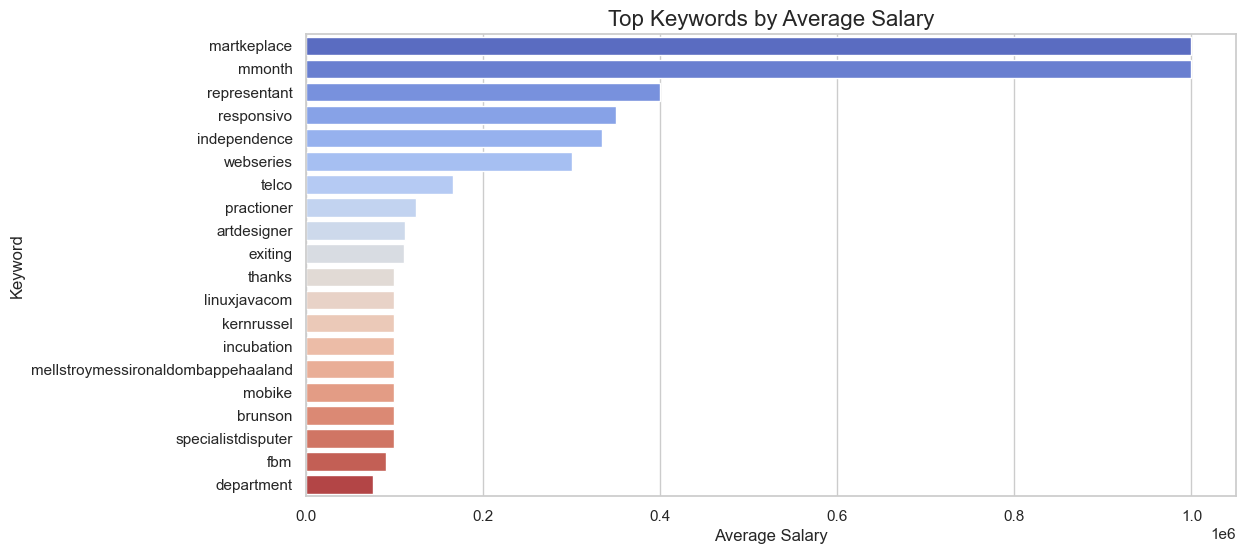

In [204]:
# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='salary', y='Keyword', data=top_salary_keywords, palette='coolwarm')
plt.title('Top Keywords by Average Salary', fontsize=16)
plt.xlabel('Average Salary', fontsize=12)
plt.ylabel('Keyword', fontsize=12)
plt.show()



### Insights from Top Keywords by Average Salary

1. **High-Salary Keywords**: Keywords like `martkeplace` and `mmonth` exhibit the highest average salaries, potentially representing high-value or niche job categories.  
2. **Significant Earning Potential**: Keywords such as `representant` and `responsivo` also rank highly, indicating roles with significant earning potential.  
3. **Emerging Roles**: The presence of unconventional keywords (e.g., `webseries` and `independence`) highlights unique or emerging job roles commanding notable salaries.  
4. **Generalized Roles**: Lower-ranked keywords like `department` and `fbm` suggest more generalized or less lucrative roles in the dataset.


**Correlation Analysis**
Scatter plots help visualize relationships between hourly rates and salaries for specific keywords.

In [205]:
# Create a DataFrame with Keyword and Average Salary
keyword_salary_df = pd.DataFrame({
    'Keyword': keyword_salary.index,
    'Average Salary': keyword_salary.values
})


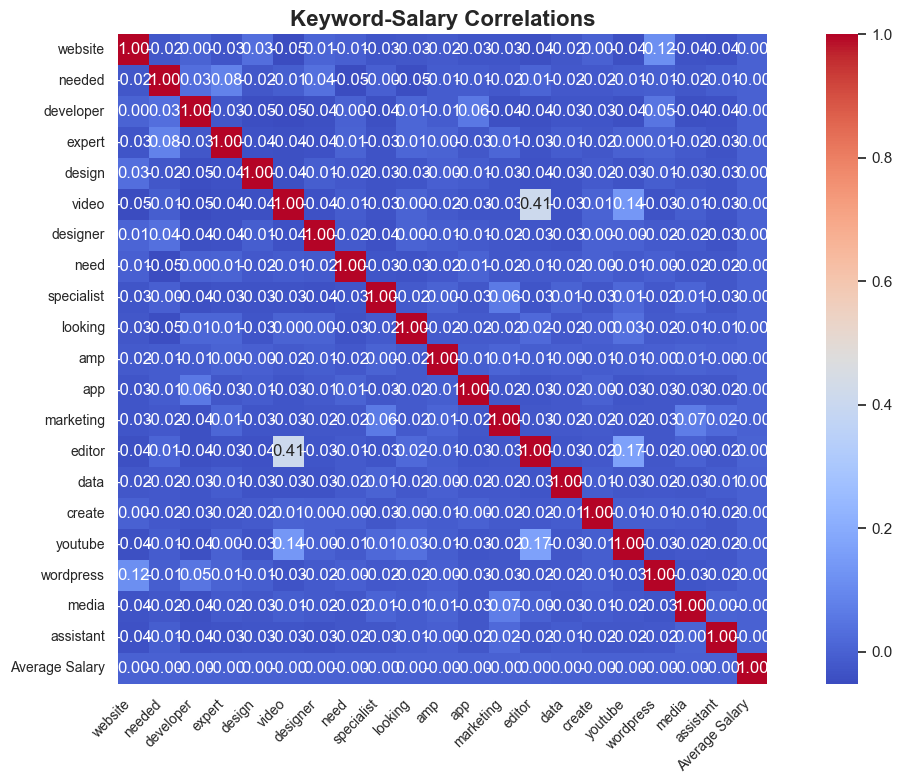

In [206]:
# Select top 20 keywords for correlation analysis
selected_keywords = tfidf_scores.head(20).index  # Reduce to top 20 keywords for clarity
selected_keyword_df = tfidf_df[selected_keywords].copy()  # Filter the TF-IDF DataFrame for these keywords
selected_keyword_df['Average Salary'] = data['budget']  # Add the salary column for correlation

# Generate the heatmap
plt.figure(figsize=(12, 8))  # Adjust size for better visibility
correlation_matrix = selected_keyword_df.corr()  # Compute correlation matrix
sns.heatmap(
    correlation_matrix, 
    annot=True, 
    cmap='coolwarm', 
    fmt='.2f',  # Format annotations to 2 decimal places
    cbar=True, 
    square=True
)
plt.title('Keyword-Salary Correlations', fontsize=16, fontweight='bold')
plt.xticks(fontsize=10, rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


- **Low Salary Correlation**: Most keywords show minimal correlation with average salary, indicating salary is influenced by broader factors.  
- **Notable Positive Correlation**: "Editor" and "design" exhibit moderate correlations (e.g., ~0.41), suggesting higher relevance to salary.  
- **Negligible Impact**: Keywords like "website," "developer," and "marketing" have very low or no correlation with salary.  
- **Insights**: Focused skills like editing and design may have a stronger influence on salary outcomes compared to general terms.  


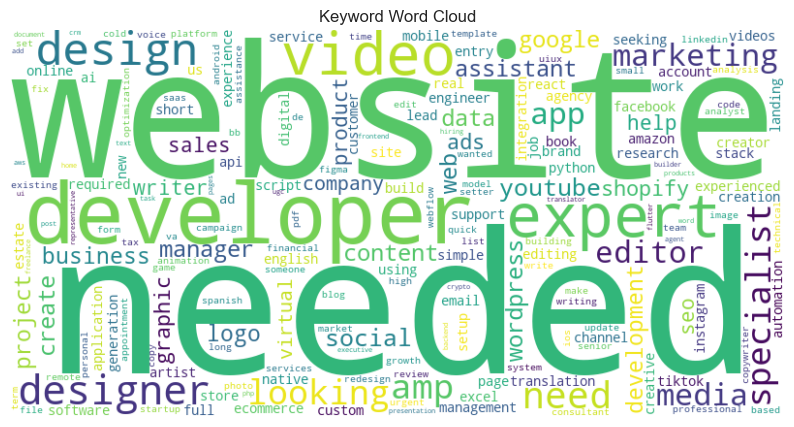

In [207]:
# Create a word cloud for the most frequent keywords
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(keyword_counts)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Keyword Word Cloud')
plt.show()

C:\Users\91860\AppData\Local\Temp\ipykernel_10568\2820526487.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


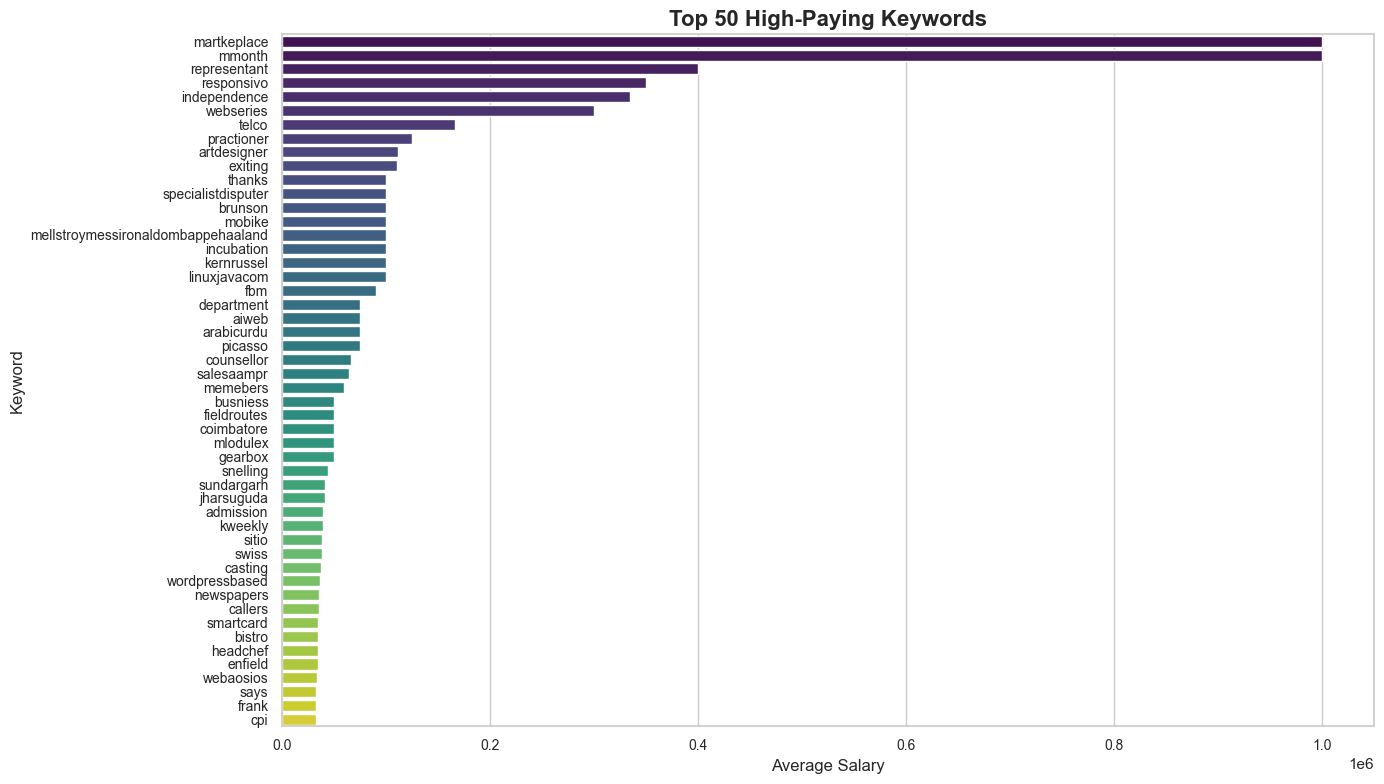

In [208]:
# Sort keywords by average salary in descending order
top_50_keywords = keyword_salary_df.sort_values(by='Average Salary', ascending=False).head(50)

# Plot the bar chart
plt.figure(figsize=(14, 8))
sns.barplot(
    data=top_50_keywords,
    x='Average Salary',
    y='Keyword',
    palette='viridis'
)
plt.title('Top 50 High-Paying Keywords', fontsize=16, fontweight='bold')
plt.xlabel('Average Salary', fontsize=12)
plt.ylabel('Keyword', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


- **Top-Paying Keywords**: Keywords like "marketplace," "mmonth," and "representant" are associated with the highest salaries.  
- **Niche Roles**: Terms like "artdesigner," "specialistdisputer," and "mobike" indicate specific high-paying specialized fields.  
- **Technical Focus**: Keywords such as "linuxjavacom" and "aiweb" suggest high earnings in tech-related domains.  
- **Geographic Relevance**: Place-based keywords like "sundargarh" and "jharsuguda" indicate location-linked high-salary opportunities.  


# **Task 2: Identifying Emerging Job Categories**

In [209]:
# Convert to DataFrame
df = pd.DataFrame(data)

In [210]:
# Convert 'published_date' to datetime
df['published_date'] = pd.to_datetime(df['published_date'])

In [211]:
# Extract Year and Month for trend analysis
df['Year-Month'] = df['published_date'].dt.to_period('M')

C:\Users\91860\AppData\Local\Temp\ipykernel_10568\3422008225.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['Year-Month'] = df['published_date'].dt.to_period('M')


In [212]:
df

,title,link,published_date,is_hourly,hourly_low,hourly_high,budget,country,Cleaned Job Title,salary,Year-Month
1,Full Stack Developer,https://www.upwork.com/jobs/Full-Stack-Develop...,2024-02-17 09:09:17+00:00,False,15.0,30.0,1100.0,United States,full stack developer,1100.0,2024-02
2,SMMA Bubble App,https://www.upwork.com/jobs/SMMA-Bubble-App_%7...,2024-02-17 09:08:46+00:00,True,10.0,30.0,20.0,United States,smma bubble app,20.0,2024-02
3,Talent Hunter Specialized in Marketing,https://www.upwork.com/jobs/Talent-Hunter-Spec...,2024-02-17 09:08:08+00:00,True,15.0,30.0,22.5,United States,talent hunter specialized marketing,22.5,2024-02
4,Data Engineer,https://www.upwork.com/jobs/Data-Engineer_%7E0...,2024-02-17 09:07:42+00:00,False,15.0,30.0,650.0,India,data engineer,650.0,2024-02
5,SEO for Portuguese Psychologist site,https://www.upwork.com/jobs/SEO-for-Portuguese...,2024-02-17 09:07:41+00:00,True,15.0,30.0,22.5,Portugal,seo portuguese psychologist site,22.5,2024-02
...,...,...,...,...,...,...,...,...,...,...,...
244823,Need Facebook advertising experts to launch pr...,https://www.upwork.com/jobs/Need-Facebook-adve...,2024-03-24 13:28:38+00:00,True,20.0,100.0,60.0,Zambia,need facebook advertising experts launch products,60.0,2024-03
244824,Digital/Telemarketing/Sales/OutSide Sales,https://www.upwork.com/jobs/Digital-Telemarket...,2024-03-24 13:40:52+00:00,False,15.0,30.0,100.0,Sri Lanka,digitaltelemarketingsalesoutside sales,100.0,2024-03
244825,WordPress Template Edits,https://www.upwork.com/jobs/WordPress-Template...,2024-03-24 13:37:50+00:00,True,5.0,30.0,17.5,United States,wordpress template edits,17.5,2024-03
244826,ELEMENTOR PRO For quick fix (Wordpress),https://www.upwork.com/jobs/ELEMENTOR-PRO-For-...,2024-03-24 13:52:15+00:00,False,15.0,30.0,15.0,France,elementor pro quick fix wordpress,15.0,2024-03


In [213]:
# Convert 'published_date' to datetime
df['published_date'] = pd.to_datetime(df['published_date'])

In [214]:
# Extract Year and Month for trend analysis
df['Year-Month'] = df['published_date'].dt.to_period('M')

C:\Users\91860\AppData\Local\Temp\ipykernel_10568\3422008225.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['Year-Month'] = df['published_date'].dt.to_period('M')


In [215]:
# Define job categories and relevant keywords
def map_to_category(title):
    title = title.lower()
    
    # Software Development
    if any(word in title for word in ['developer', 'software', 'engineer', 'programmer', 'devops', 'backend', 'frontend', 'full stack', 'python', 'java', 'c++']):
        return 'Software Development'
    
    # Data Science
    elif any(word in title for word in ['data', 'machine learning', 'ai', 'analytics', 'data science', 'big data', 'data engineer']):
        return 'Data Science'
    
    # Design
    elif any(word in title for word in ['designer', 'ui', 'ux', 'graphic', 'visual', 'motion', 'web design', 'interaction']):
        return 'Design'
    
    # Marketing
    elif any(word in title for word in ['marketing', 'seo', 'advertising', 'campaign', 'social media', 'growth hacking', 'digital marketing']):
        return 'Marketing'
    
    # Writing
    elif any(word in title for word in ['writer', 'content', 'editor', 'author', 'translator', 'copywriter', 'blogger', 'journalist']):
        return 'Writing'
    
    # Project Management
    elif any(word in title for word in ['manager', 'management', 'project manager', 'pm', 'scrum', 'agile', 'product owner']):
        return 'Project Management'
    
    # Customer Support
    elif any(word in title for word in ['customer', 'support', 'service', 'client', 'helpdesk', 'customer service']):
        return 'Customer Support'
    
    # Sales
    elif any(word in title for word in ['sales', 'business development', 'account', 'growth', 'sales manager', 'lead generation']):
        return 'Sales'
    
    # Finance
    elif any(word in title for word in ['finance', 'accounting', 'bookkeeper', 'financial', 'auditor', 'analyst']):
        return 'Finance'
    
    # Legal
    elif any(word in title for word in ['legal', 'lawyer', 'attorney', 'paralegal', 'legal advisor']):
        return 'Legal'
    
    # Education
    elif any(word in title for word in ['teacher', 'trainer', 'tutor', 'educator', 'lecturer', 'instructor']):
        return 'Education'
    
    # Healthcare
    elif any(word in title for word in ['nurse', 'doctor', 'physician', 'healthcare', 'medical', 'caregiver', 'therapist']):
        return 'Healthcare'
    
    # Human Resources
    elif any(word in title for word in ['hr', 'human resources', 'recruiter', 'talent acquisition', 'hr manager']):
        return 'Human Resources'
    
    # Engineering
    elif any(word in title for word in ['mechanical', 'electrical', 'civil', 'engineer', 'aerospace', 'engineering']):
        return 'Engineering'
    
    # Architecture
    elif any(word in title for word in ['architect', 'architecture', 'urban planning']):
        return 'Architecture'
    
    # Other (fallback category)
    else:
        return 'Other'


In [216]:
# Apply mapping function to create the 'Category' column
df['Category'] = df['title'].apply(map_to_category)

In [217]:
# Display job category counts
print("Job Category Counts:")
print(df['Category'].value_counts())

Job Category Counts:
Category
Other                   103715
Design                   27805
Data Science             25445
Software Development     23752
Writing                  16692
Marketing                15000
Project Management        9024
Sales                     7642
Customer Support          4129
Finance                   1685
Legal                     1299
Human Resources           1107
Education                  874
Architecture               731
Healthcare                 702
Engineering                149
Name: count, dtype: int64


In [218]:
# Aggregating job postings by Category and Year-Month
category_trends = df.groupby(['Year-Month', 'Category']).size().reset_index(name='Job Count')

In [219]:
category_trends

,Year-Month,Category,Job Count
0,2023-11,Architecture,1
1,2023-12,Data Science,2
2,2023-12,Design,1
3,2023-12,Marketing,1
4,2023-12,Other,2
5,2023-12,Sales,1
6,2023-12,Writing,3
7,2024-01,Customer Support,7
8,2024-01,Data Science,8
9,2024-01,Design,6


In [220]:
# Pivot the data for time-series analysis (jobs per category per month)
category_trends_pivot = category_trends.pivot_table(index='Year-Month', columns='Category', values='Job Count', aggfunc='sum', fill_value=0)

In [221]:
category_trends_pivot

Category,Architecture,Customer Support,Data Science,Design,Education,Engineering,Finance,Healthcare,Human Resources,Legal,Marketing,Other,Project Management,Sales,Software Development,Writing
Year-Month,,,,,,,,,,,,,,,,
2023-11,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2023-12,0,0,2,1,0,0,0,0,0,0,1,2,0,1,0,3
2024-01,0,7,8,6,0,0,0,1,0,1,6,32,9,9,13,4
2024-02,284,1678,10872,11536,370,66,715,319,505,537,6116,42919,3662,3132,9742,7410
2024-03,446,2444,14563,16262,504,83,970,382,602,761,8877,60762,5353,4500,13997,9275


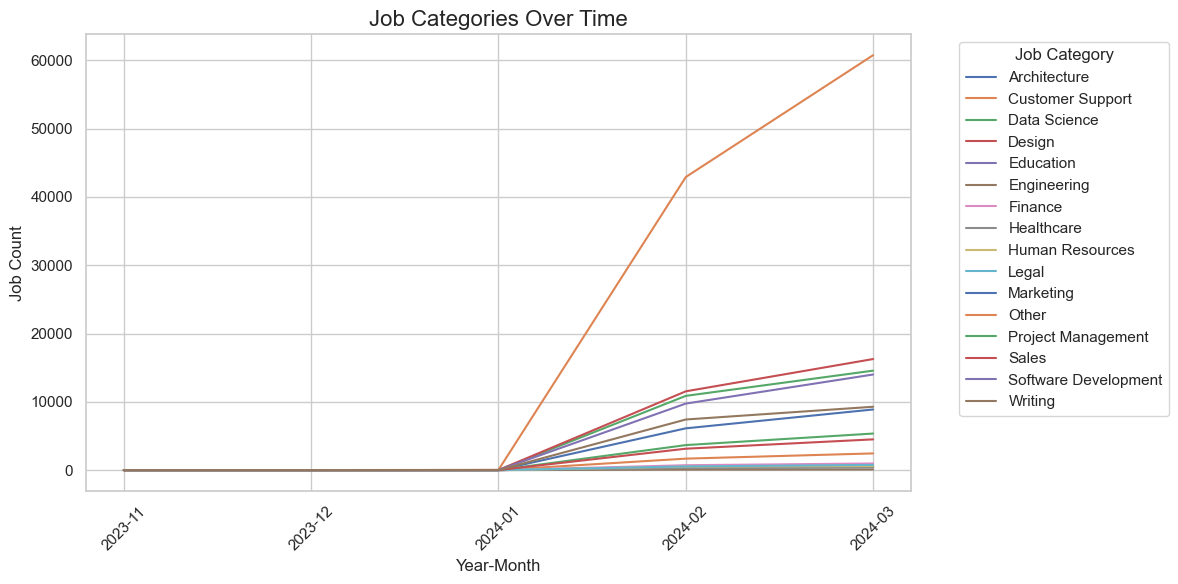

In [222]:
# Set the style for the plot
sns.set(style="whitegrid")

# Plotting the time-series data
plt.figure(figsize=(12, 6))

# Plot each category trend (one line per category)
for category in category_trends_pivot.columns:
    plt.plot(category_trends_pivot.index.astype(str), category_trends_pivot[category], label=category)

# Set plot labels and title
plt.title("Job Categories Over Time", fontsize=16)
plt.xlabel("Year-Month", fontsize=12)
plt.ylabel("Job Count", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Job Category", bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

**Emerging Categories Analysis**

In [223]:
# Calculate growth: percentage change between consecutive months
category_growth = category_trends_pivot.pct_change().fillna(0) * 100  # Growth in percentage


In [224]:
# Rank the categories based on growth
category_growth_last_month = category_growth.iloc[-1]
emerging_categories = category_growth_last_month.sort_values(ascending=False)

In [225]:
# Display the ranked emerging job categories
print("Emerging Job Categories (Ranked by Growth):")
print(emerging_categories)

Emerging Job Categories (Ranked by Growth):
Category
Architecture            57.042254
Project Management      46.176952
Customer Support        45.649583
Marketing               45.143885
Sales                   43.678161
Software Development    43.676863
Legal                   41.713222
Other                   41.573662
Design                  40.967406
Education               36.216216
Finance                 35.664336
Data Science            33.949595
Engineering             25.757576
Writing                 25.168691
Healthcare              19.749216
Human Resources         19.207921
Name: 2024-03, dtype: float64


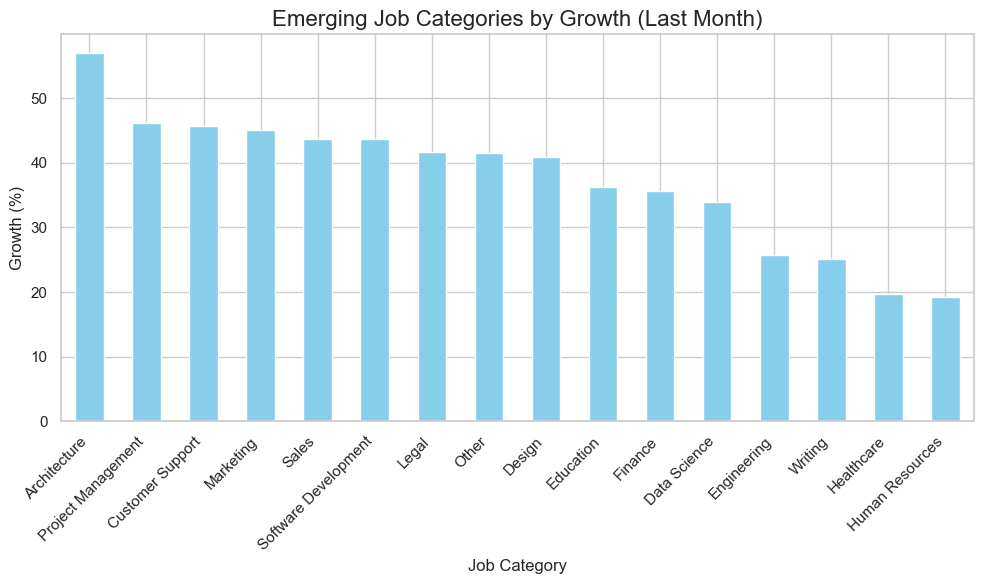

Emerging Job Categories (Ranked by Growth):


Category
Architecture            57.042254
Project Management      46.176952
Customer Support        45.649583
Marketing               45.143885
Sales                   43.678161
Software Development    43.676863
Legal                   41.713222
Other                   41.573662
Design                  40.967406
Education               36.216216
Finance                 35.664336
Data Science            33.949595
Engineering             25.757576
Writing                 25.168691
Healthcare              19.749216
Human Resources         19.207921
Name: 2024-03, dtype: float64

In [226]:
# Calculate growth: percentage change between consecutive months
category_growth = category_trends_pivot.pct_change().fillna(0) * 100  # Growth in percentage

# Rank the categories based on growth (last month)
category_growth_last_month = category_growth.iloc[-1]
emerging_categories = category_growth_last_month.sort_values(ascending=False)

# Plotting the emerging categories
plt.figure(figsize=(10, 6))
emerging_categories.plot(kind='bar', color='skyblue')

# Set plot labels and title
plt.title("Emerging Job Categories by Growth (Last Month)", fontsize=16)
plt.xlabel("Job Category", fontsize=12)
plt.ylabel("Growth (%)", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

# Display the ranked emerging job categories
print("Emerging Job Categories (Ranked by Growth):")
emerging_categories

In [227]:
data.columns

Index(['title', 'link', 'published_date', 'is_hourly', 'hourly_low',
       'hourly_high', 'budget', 'country', 'Cleaned Job Title', 'salary'],
      dtype='object')

In [228]:
import xgboost as xgb

# **Task 3: Forecasting High-Demand Roles**

In [229]:
 #Convert the 'published_date' to datetime format and extract features like year and month
data['published_date'] = pd.to_datetime(data['published_date'])
data['year'] = data['published_date'].dt.year
data['month'] = data['published_date'].dt.month

In [230]:
# Aggregate job posting data by job title, year, and month
role_data = data.groupby(['Cleaned Job Title', 'year', 'month']).size().reset_index(name='postings')

In [231]:
# Create features (X) and target variable (y)
X = role_data[['year', 'month']]  # Features: year and month
y = role_data['postings']  # Target: Number of job postings

In [232]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [233]:
# Define the regression models (Linear Regression, Random Forest)
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
}

# Dictionary to store results (RMSE values for each model)
results = {}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train_scaled, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test_scaled)
    
    # Calculate RMSE (Root Mean Squared Error) to evaluate model performance
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    results[model_name] = rmse

# Sort models by RMSE (lower is better)
sorted_results = sorted(results.items(), key=lambda x: x[1])

# Print the RMSE for each model
print("Model Performance (RMSE):")
for model_name, rmse in sorted_results:
    print(f"{model_name}: {rmse:.4f}")


Model Performance (RMSE):
Random Forest: 1.7586
Linear Regression: 1.7586


In [234]:
# Visualize predicted job demand for each role
best_model_name = sorted_results[0][0]  # Get the best model (based on RMSE)
best_model = models[best_model_name]

# Fit the best model on the entire training set
best_model.fit(X_train_scaled, y_train)

# Make predictions for the entire dataset
role_predictions = best_model.predict(X_test_scaled)

In [235]:
# Create a DataFrame to store the predictions and corresponding job roles
role_data['predicted_demand'] = best_model.predict(scaler.transform(role_data[['year', 'month']]))

In [236]:
# Aggregate predicted demand by job role
role_demand = role_data.groupby('Cleaned Job Title')['predicted_demand'].sum().reset_index()

## **Task 4: Comparative Salary Analysis by Region**

In [237]:
# Calculate the average salary by country
salary_by_country = data.groupby('country')['salary'].mean().reset_index()

In [238]:
 #Sort by average salary for better visualization
salary_by_country = salary_by_country.sort_values(by='salary', ascending=False)


In [239]:
salary_by_country

,country,salary
17,Barbados,2050.280000
0,Aland Islands,2000.000000
183,Sweden,1972.723706
43,Colombia,1685.088008
152,Philippines,1593.319044
...,...,...
166,San Marino,12.705128
206,Vanuatu,6.500000
141,Niue,5.000000
161,Saint Helena,5.000000


In [240]:
# Limit to top N countries (e.g., top 10 countries by average salary)
top_n = 10
salary_by_country_top = salary_by_country.head(top_n)

C:\Users\91860\AppData\Local\Temp\ipykernel_10568\2379208476.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='salary', y='country', data=salary_by_country_top, palette='viridis')


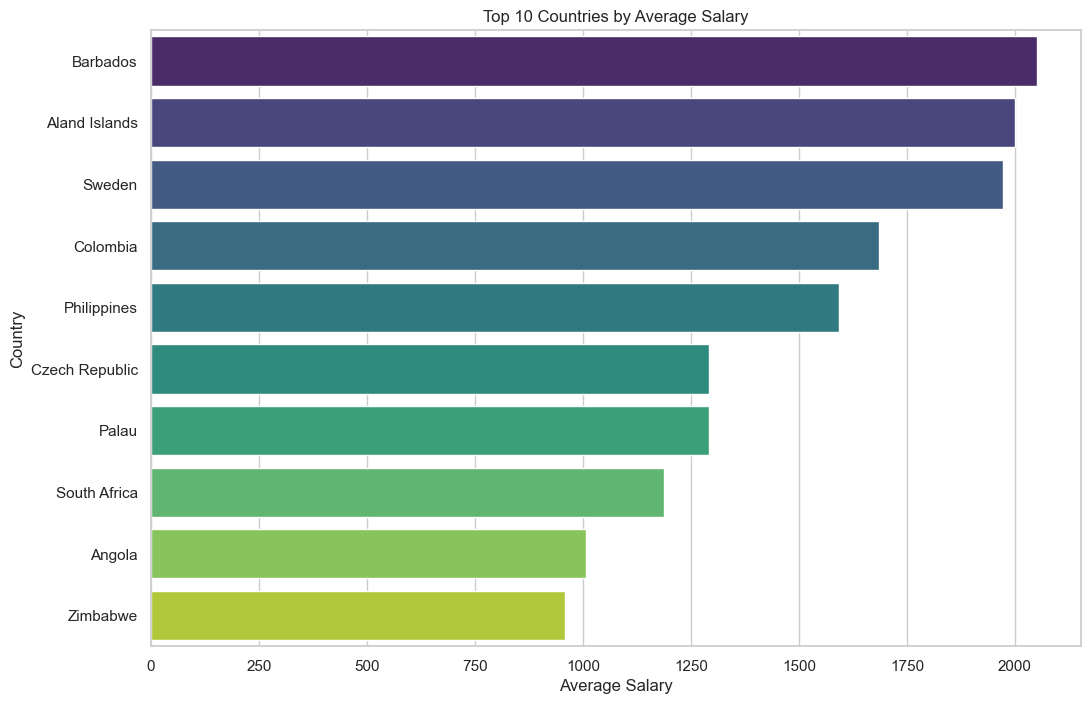

In [241]:
# Bar chart for average salary by country (only top N countries)
plt.figure(figsize=(12, 8))
sns.barplot(x='salary', y='country', data=salary_by_country_top, palette='viridis')
plt.title(f'Top {top_n} Countries by Average Salary')
plt.xlabel('Average Salary')
plt.ylabel('Country')
plt.show()

In [242]:
import geodatasets

In [243]:
geodatasets.data

{'geoda': {'airbnb': {'url': 'https://geodacenter.github.io/data-and-lab//data/airbnb.zip',
   'license': 'NA',
   'attribution': 'Center for Spatial Data Science, University of Chicago',
   'name': 'geoda.airbnb',
   'description': 'Airbnb rentals, socioeconomics, and crime in Chicago',
   'geometry_type': 'Polygon',
   'nrows': 77,
   'ncols': 21,
   'details': 'https://geodacenter.github.io/data-and-lab//airbnb/',
   'hash': 'a2ab1e3f938226d287dd76cde18c00e2d3a260640dd826da7131827d9e76c824',
   'filename': 'airbnb.zip'},
  'atlanta': {'url': 'https://geodacenter.github.io/data-and-lab//data/atlanta_hom.zip',
   'license': 'NA',
   'attribution': 'Center for Spatial Data Science, University of Chicago',
   'name': 'geoda.atlanta',
   'description': 'Atlanta, GA region homicide counts and rates',
   'geometry_type': 'Polygon',
   'nrows': 90,
   'ncols': 24,
   'details': 'https://geodacenter.github.io/data-and-lab//atlanta_old/',
   'hash': 'a33a76e12168fe84361e60c88a9df4856730487305846c559715c89b1a2b5e09',
   'filename': 'atlanta_hom.zip',
   'members': ['atlanta_hom/atl_hom.geojson']},
  'cars': {'url': 'https://geodacenter.github.io/data-and-lab//data/Abandoned_Vehicles_Map.csv',
   'license': 'NA',
   'attribution': 'Center for Spatial Data Science, University of Chicago',
   'name': 'geoda.cars',
   'description': '2011 abandoned vehicles in Chicago (311 complaints).',
   'geometry_type': 'Point',
   'nrows': 137867,
   'ncols': 21,
   'details': 'https://geodacenter.github.io/data-and-lab//1-source-and-description/',
   'hash': '6a0b23bc7eda2dcf1af02d43ccf506b24ca8d8c6dc2fe86a2a1cc051b03aae9e',
   'filename': 'Abandoned_Vehicles_Map.csv'},
  'charleston1': {'url': 'https://geodacenter.github.io/data-and-lab//data/CharlestonMSA.zip',
   'license': 'NA',
   'attribution': 'Center for Spatial Data Science, University of Chicago',
   'name': 'geoda.charleston1',
   'description': '2000 Census Tract Data for Charleston, SC MSA and counties',
   'geometry_type': 'Polygon',
   'nrows': 117,
   'ncols': 31,
   'details': 'https://geodacenter.github.io/data-and-lab//charleston-1_old/',
   'hash': '4a4fa9c8dd4231ae0b2f12f24895b8336bcab0c28c48653a967cffe011f63a7c',
   'filename': 'CharlestonMSA.zip',
   'members': ['CharlestonMSA/sc_final_census2.gpkg']},
  'charleston2': {'url': 'https://geodacenter.github.io/data-and-lab//data/CharlestonMSA2.zip',
   'license': 'NA',
   'attribution': 'Center for Spatial Data Science, University of Chicago',
   'name': 'geoda.charleston2',
   'description': '1998 and 2001 Zip Code Business Patterns (Census Bureau) for Charleston, SC MSA',
   'geometry_type': 'Polygon',
   'nrows': 42,
   'ncols': 60,
   'details': 'https://geodacenter.github.io/data-and-lab//charleston2/',
   'hash': '056d5d6e236b5bd95f5aee26c77bbe7d61bd07db5aaf72866c2f545205c1d8d7',
   'filename': 'CharlestonMSA2.zip',
   'members': ['CharlestonMSA2/CharlestonMSA2.gpkg']},
  'chicago_health': {'url': 'https://geodacenter.github.io/data-and-lab//data/comarea.zip',
   'license': 'NA',
   'attribution': 'Center for Spatial Data Science, University of Chicago',
   'name': 'geoda.chicago_health',
   'description': 'Chicago Health + Socio-Economics',
   'geometry_type': 'Polygon',
   'nrows': 77,
   'ncols': 87,
   'details': 'https://geodacenter.github.io/data-and-lab//comarea_vars/',
   'hash': '4e872adb552786eae2fcd745524696e5e4cd33cc9a6c032471c0e75328871401',
   'filename': 'comarea.zip'},
  'chicago_commpop': {'url': 'https://geodacenter.github.io/data-and-lab//data/chicago_commpop.zip',
   'license': 'NA',
   'attribution': 'Center for Spatial Data Science, University of Chicago',
   'name': 'geoda.chicago_commpop',
   'description': 'Chicago Community Area Population Percent Change for 2000 and 2010',
   'geometry_type': 'Polygon',
   'nrows': 77,
   'ncols': 9,
   'details': 'https://geodacenter.github.io/data-and-lab//commpop/',
   'hash': '1dbebb50c8ea47e2279ea819ef64ba793bdee2b88e4716bd6c6ec0e0d8e0e05b',
   'filename': 'c

In [244]:
import geopandas as gpd

# Path to the shapefile (adjust it based on where you extracted the files)
shapefile_path = 'ne_110m_admin_0_countries'

# Load the shapefile into GeoPandas
world = gpd.read_file(shapefile_path)

# Display the first few rows to check the data
print(world.head())


        featurecla  scalerank  LABELRANK                   SOVEREIGNT SOV_A3  \
0  Admin-0 country          1          6                         Fiji    FJI   
1  Admin-0 country          1          3  United Republic of Tanzania    TZA   
2  Admin-0 country          1          7               Western Sahara    SAH   
3  Admin-0 country          1          2                       Canada    CAN   
4  Admin-0 country          1          2     United States of America    US1   

   ADM0_DIF  LEVEL               TYPE TLC                        ADMIN  ...  \
0         0      2  Sovereign country   1                         Fiji  ...   
1         0      2  Sovereign country   1  United Republic of Tanzania  ...   
2         0      2      Indeterminate   1               Western Sahara  ...   
3         0      2  Sovereign country   1                       Canada  ...   
4         1      2            Country   1     United States of America  ...   

      FCLASS_TR     FCLASS_ID     FCLASS_PL 

In [245]:
# Clean the data (remove rows with missing salary or country)
salary_data =data.dropna(subset=['salary', 'country'])

# Calculate average salary per country
average_salary = data.groupby('country')['salary'].mean().reset_index()

In [246]:
print(world.columns)


Index(['featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3',
       'ADM0_DIF', 'LEVEL', 'TYPE', 'TLC', 'ADMIN',
       ...
       'FCLASS_TR', 'FCLASS_ID', 'FCLASS_PL', 'FCLASS_GR', 'FCLASS_IT',
       'FCLASS_NL', 'FCLASS_SE', 'FCLASS_BD', 'FCLASS_UA', 'geometry'],
      dtype='object', length=169)


In [247]:
# Merge the salary data with the map data based on the country name
merged = world.set_index('ADMIN').join(average_salary.set_index('country'))

# Display the first few rows of the merged data
print(merged.head())


                                  featurecla  scalerank  LABELRANK  \
ADMIN                                                                
Fiji                         Admin-0 country          1          6   
United Republic of Tanzania  Admin-0 country          1          3   
Western Sahara               Admin-0 country          1          7   
Canada                       Admin-0 country          1          2   
United States of America     Admin-0 country          1          2   

                                              SOVEREIGNT SOV_A3  ADM0_DIF  \
ADMIN                                                                       
Fiji                                                Fiji    FJI         0   
United Republic of Tanzania  United Republic of Tanzania    TZA         0   
Western Sahara                            Western Sahara    SAH         0   
Canada                                            Canada    CAN         0   
United States of America        United States o

C:\Users\91860\AppData\Local\Temp\ipykernel_10568\4240627820.py:8: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(merged.geometry.centroid.x, merged.geometry.centroid.y, merged.index):


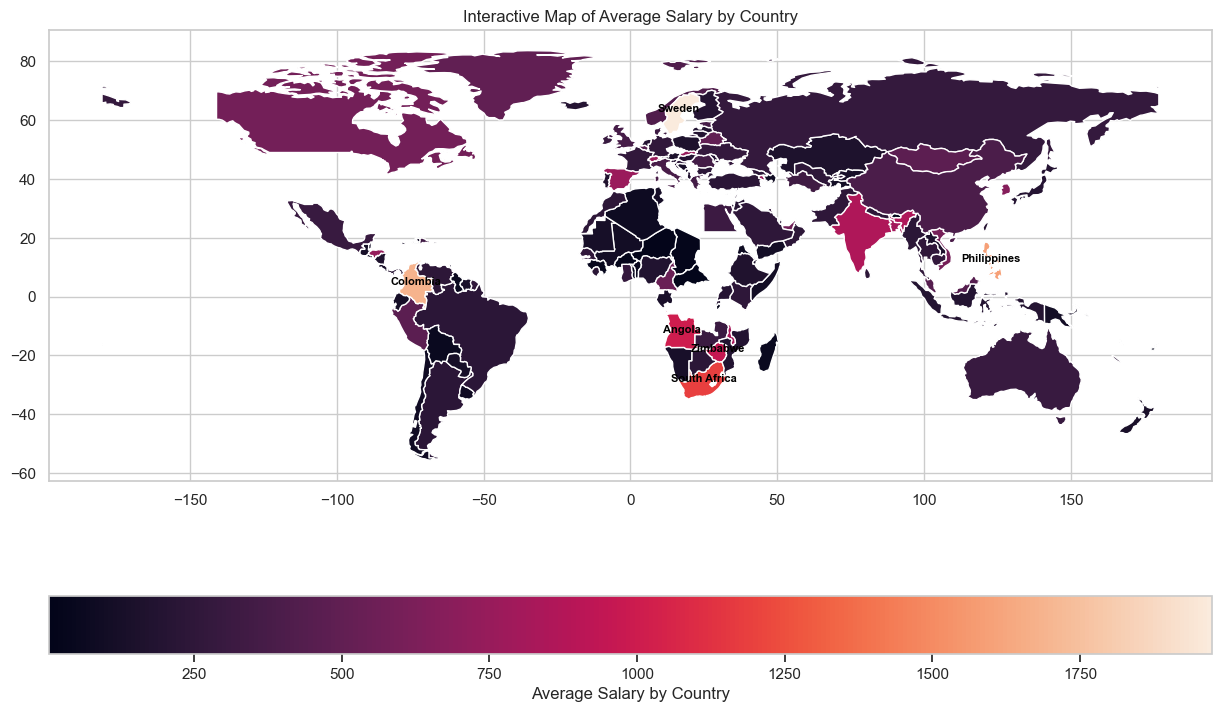

In [248]:
 #Plot the map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged.plot(column='salary', ax=ax, legend=True,
            legend_kwds={'label': "Average Salary by Country",
                         'orientation': "horizontal"})

# Add country labels for top N countries (adjust label positions to avoid overlap)
for x, y, label in zip(merged.geometry.centroid.x, merged.geometry.centroid.y, merged.index):
    # Only label the top N countries that have salary data available
    if label in salary_by_country_top['country'].values:
        ax.text(x, y, label, fontsize=8, ha='center', color='black', weight='bold', rotation=0)

plt.title('Interactive Map of Average Salary by Country')
plt.show()

# **Task 5: Building a Personalized Job Recommendation Engine**

In [249]:
# Combine important columns to create job description vectors
df['job_description'] = df['title'] + " " + df['country'] + " " + df['is_hourly'].astype(str)

In [250]:
# Use TfidfVectorizer to encode job descriptions
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
job_vectors = vectorizer.fit_transform(df['job_description'])

In [251]:
import pickle
# Save the model
with open("model.pkl", "wb") as file:
    pickle.dump(vectorizer, file)

In [252]:
# Combine relevant columns to create a job description feature
data['combined'] = data['Cleaned Job Title'] + ' ' + data['country'] + ' ' + data['is_hourly'].astype(str)

In [253]:
# Apply TF-IDF Vectorization to the 'combined' feature
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
job_vectors = tfidf.fit_transform(data['combined'])

# Save the vectorizer for reuse
with open("tfidf_model.pkl", "wb") as file:
    pickle.dump(tfidf, file)

print("TF-IDF vectorization complete and model saved.")


TF-IDF vectorization complete and model saved.


In [254]:
# Function to recommend jobs based on user preferences
def recommend_jobs(user_input, top_n=5):
    """
    Recommends jobs based on the user's input.
    """
    # Transform the user input into the same vector space
    user_vector = tfidf.transform([user_input])
    
    # Calculate cosine similarity with all job descriptions
    similarity_scores = cosine_similarity(user_vector, job_vectors)
    
    # Get the top N jobs
    top_indices = np.argsort(similarity_scores[0])[::-1][:top_n]
    
    # Retrieve and return the top matching jobs
    return data.iloc[top_indices][['Cleaned Job Title', 'country', 'salary']]


In [255]:
# Initialize MLflow
mlflow.set_experiment("Job Recommendation Engine")

# Log parameters and artifacts
with mlflow.start_run():
    mlflow.log_param("TF-IDF Features", tfidf.get_feature_names_out())
    mlflow.log_artifact("tfidf_model.pkl")
    mlflow.log_metric("Vectorization Complete", 1)
    
    print("Model tracking complete in MLflow.")


Model tracking complete in MLflow.


In [256]:
data.columns

Index(['title', 'link', 'published_date', 'is_hourly', 'hourly_low',
       'hourly_high', 'budget', 'country', 'Cleaned Job Title', 'salary',
       'year', 'month', 'combined'],
      dtype='object')

# Task 7: Remote Work Trends Analysis

In [257]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL for the search results page with 'remote' jobs
base_url = "https://www.indeed.com/jobs?q=remote&l="

# The user-agent header is necessary to prevent the request from being blocked
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}


In [258]:
# Fetch the page
response = requests.get(base_url, headers=headers)

# Parse the content using BeautifulSoup
soup = BeautifulSoup(response.text, 'html.parser')


In [259]:
# Find job cards on the page
job_cards = soup.find_all('div', class_='jobsearch-SerpJobCard')

# Initialize lists to store the extracted data
job_titles = []
company_names = []
locations = []
job_links = []

# Loop through each job card and extract the necessary information
for job in job_cards:
    title = job.find('a', class_='jobtitle').text.strip()
    company = job.find('span', class_='company').text.strip() if job.find('span', class_='company') else "N/A"
    location = job.find('div', class_='location').text.strip() if job.find('div', class_='location') else "N/A"
    job_link = "https://www.indeed.com" + job.find('a', class_='jobtitle')['href']

    # Append the details to the lists
    job_titles.append(title)
    company_names.append(company)
    locations.append(location)
    job_links.append(job_link)

# Create a DataFrame to store the extracted data
job_data = pd.DataFrame({
    'Job Title': job_titles,
    'Company': company_names,
    'Location': locations,
    'Job Link': job_links
})

# Save the DataFrame to a CSV file
job_data.to_csv('remote_jobs_indeed.csv', index=False)


In [260]:
def fetch_jobs_from_page(page_number):
    url = f"https://www.indeed.com/jobs?q=remote&l=&start={page_number*10}"
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, 'html.parser')
    return soup

# Initialize lists to store the data
job_titles = []
company_names = []
locations = []
job_links = []

# Scrape the first 5 pages (10 jobs per page)
for page in range(5):
    soup = fetch_jobs_from_page(page)
    job_cards = soup.find_all('div', class_='jobsearch-SerpJobCard')

    # Extract job details from the current page
    for job in job_cards:
        title = job.find('a', class_='jobtitle').text.strip()
        company = job.find('span', class_='company').text.strip() if job.find('span', class_='company') else "N/A"
        location = job.find('div', class_='location').text.strip() if job.find('div', class_='location') else "N/A"
        job_link = "https://www.indeed.com" + job.find('a', class_='jobtitle')['href']

        # Append to the lists
        job_titles.append(title)
        company_names.append(company)
        locations.append(location)
        job_links.append(job_link)

# Save all data to CSV
job_data = pd.DataFrame({
    'Job Title': job_titles,
    'Company': company_names,
    'Location': locations,
    'Job Link': job_links
})
job_data.to_csv('remote_jobs_indeed_multiple_pages.csv', index=False)


In [261]:
# Identify Remote Jobs
df['is_remote'] = df['job_description'].str.contains(
    'remote|work from home|telecommute|online', case=False, na=False
)

In [262]:
# Compute Monthly Trends for Remote Jobs
df['YearMonth'] = df['published_date'].dt.to_period('M')  # Extract Year-Month
monthly_remote_trends = df.groupby('YearMonth')['is_remote'].mean() * 100

C:\Users\91860\AppData\Local\Temp\ipykernel_10568\3358802003.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['YearMonth'] = df['published_date'].dt.to_period('M')  # Extract Year-Month


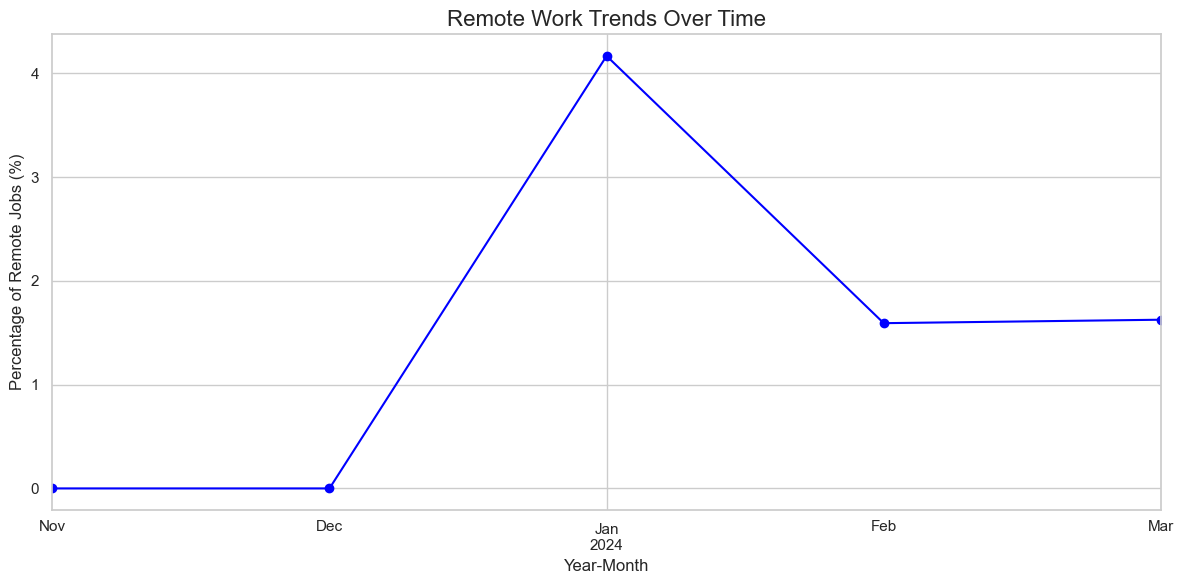

In [263]:
# Visualize Remote Work Trends Over Time
plt.figure(figsize=(12, 6))
monthly_remote_trends.plot(kind='line', marker='o', color='blue')
plt.title("Remote Work Trends Over Time", fontsize=16)
plt.xlabel("Year-Month", fontsize=12)
plt.ylabel("Percentage of Remote Jobs (%)", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.savefig("remote_work_trends.png")
plt.show()

In [264]:
# Forecast Future Trends

# Prepare data for regression
monthly_remote_trends_df = monthly_remote_trends.reset_index()
monthly_remote_trends_df['YearMonth_num'] = monthly_remote_trends_df['YearMonth'].apply(
    lambda x: x.to_timestamp().toordinal()
)
X = monthly_remote_trends_df[['YearMonth_num']]
y = monthly_remote_trends_df['is_remote']

In [265]:
# Train the regression model
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [266]:
# Predict for the next 12 months
last_date = df['published_date'].max()
future_dates = pd.date_range(
    start=last_date + pd.offsets.MonthBegin(), periods=12, freq='M'
)
future_dates_ordinal = future_dates.map(lambda x: x.toordinal()).values.reshape(-1, 1)
future_predictions = model.predict(future_dates_ordinal)

C:\Users\91860\AppData\Local\Temp\ipykernel_10568\3058955082.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(
c:\python\envs\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


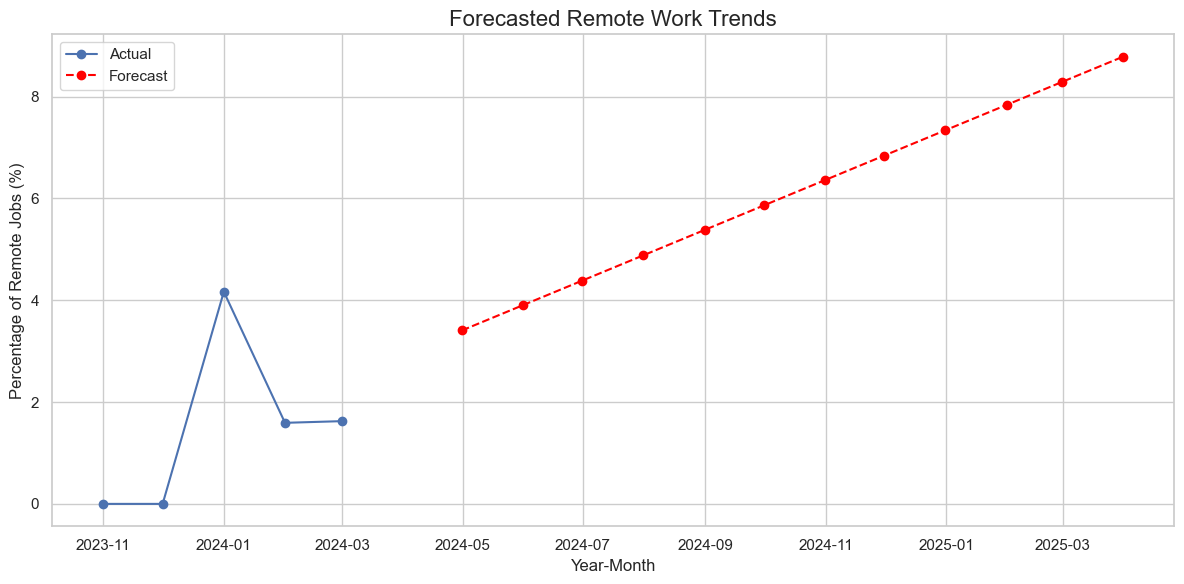

In [267]:
# Plot historical and forecasted trends
plt.figure(figsize=(12, 6))
plt.plot(monthly_remote_trends.index.to_timestamp(), monthly_remote_trends, marker='o', label="Actual")
plt.plot(future_dates, future_predictions, linestyle='--', marker='o', color='red', label="Forecast")
plt.title("Forecasted Remote Work Trends", fontsize=16)
plt.xlabel("Year-Month", fontsize=12)
plt.ylabel("Percentage of Remote Jobs (%)", fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("forecasted_remote_work_trends.png")
plt.show()

In [268]:
#Summarize Insights
remote_rate = df['is_remote'].mean() * 100
print(f"Overall Remote Work Rate: {remote_rate:.2f}%")

recent_trends = monthly_remote_trends.tail(12)
forecasted_trends = dict(zip(future_dates.strftime('%Y-%m'), future_predictions))

print("\nRecent Monthly Trends:")
print(recent_trends)

print("\nForecasted Trends:")
for date, prediction in forecasted_trends.items():
    print(f"{date}: {prediction:.2f}%")

Overall Remote Work Rate: 1.61%

Recent Monthly Trends:
YearMonth
2023-11    0.000000
2023-12    0.000000
2024-01    4.166667
2024-02    1.592181
2024-03    1.625400
Freq: M, Name: is_remote, dtype: float64

Forecasted Trends:
2024-04: 3.41%
2024-05: 3.90%
2024-06: 4.39%
2024-07: 4.88%
2024-08: 5.38%
2024-09: 5.86%
2024-10: 6.36%
2024-11: 6.84%
2024-12: 7.34%
2025-01: 7.84%
2025-02: 8.29%
2025-03: 8.78%


In [269]:
 # Save Analysis as a Report
report = f"""
Remote Work Trends Analysis Report
==================================
Overall Remote Work Rate: {remote_rate:.2f}%

Recent Monthly Trends:
{recent_trends}

Forecasted Remote Work Trends:
{"-"*40}
Month            Forecasted Remote Job Rate (%)
{"-"*40}
""" + "\n".join([f"{date}: {prediction:.2f}%" for date, prediction in forecasted_trends.items()])

with open("remote_work_trends_report.txt", "w") as file:
    file.write(report)

print("\nReport saved as 'remote_work_from_home_report.txt'")


Report saved as 'remote_work_from_home_report.txt'


# **Task 8: Predicting Future Workforce Trends**

In [270]:
from prophet import Prophet


# Group the data by 'year' and 'Cleaned Job Title' to get job count per year
job_trends = data.groupby(['year', 'Cleaned Job Title']).size().reset_index(name='job_count')

# Convert 'year' to datetime format
job_trends['year'] = pd.to_datetime(job_trends['year'], format='%Y')

# Filter data for a specific job title (e.g., 'data scientist')
data_scientist = job_trends[job_trends['Cleaned Job Title'] == 'data scientist']

# Check for missing values and ensure we have at least two non-null rows
if data_scientist.isnull().sum().any():
    print("There are missing values in the dataset. Dropping rows with NaN values.")
    data_scientist = data_scientist.dropna()

# Check if the filtered data has at least 2 rows
if len(data_scientist) < 2:
    print("Error: Not enough data points for this job title.")
else:
    # Prepare data for Prophet (rename columns for Prophet requirements)
    data_scientist = data_scientist.rename(columns={'year': 'ds', 'job_count': 'y'})

    # Initialize the Prophet model
    model = Prophet()

    # Fit the model on the data
    model.fit(data_scientist)

    # Make future predictions (e.g., for the next 12 months)
    future = model.make_future_dataframe(periods=12, freq='M')

    # Forecast the future job trends
    forecast = model.predict(future)

    # Plot the forecasted data
    model.plot(forecast)


Error: Not enough data points for this job title.


In [271]:
data.columns

Index(['title', 'link', 'published_date', 'is_hourly', 'hourly_low',
       'hourly_high', 'budget', 'country', 'Cleaned Job Title', 'salary',
       'year', 'month', 'combined'],
      dtype='object')

In [272]:
# Clean the data by dropping rows with missing values
data_cleaned = data.dropna(subset=['salary', 'Cleaned Job Title', 'year'])

# Ensure 'year' and 'month' are integers
data_cleaned['year'] = data_cleaned['year'].astype(int)
data_cleaned['month'] = data_cleaned['month'].astype(int)

# Check the cleaned data
print(data_cleaned.head())

                                    title  \
1                    Full Stack Developer   
2                         SMMA Bubble App   
3  Talent Hunter Specialized in Marketing   
4                           Data Engineer   
5    SEO for Portuguese Psychologist site   

                                                link  \
1  https://www.upwork.com/jobs/Full-Stack-Develop...   
2  https://www.upwork.com/jobs/SMMA-Bubble-App_%7...   
3  https://www.upwork.com/jobs/Talent-Hunter-Spec...   
4  https://www.upwork.com/jobs/Data-Engineer_%7E0...   
5  https://www.upwork.com/jobs/SEO-for-Portuguese...   

             published_date  is_hourly  hourly_low  hourly_high  budget  \
1 2024-02-17 09:09:17+00:00      False        15.0         30.0  1100.0   
2 2024-02-17 09:08:46+00:00       True        10.0         30.0    20.0   
3 2024-02-17 09:08:08+00:00       True        15.0         30.0    22.5   
4 2024-02-17 09:07:42+00:00      False        15.0         30.0   650.0   
5 2024-02-17 09:0

In [273]:
# Group data by year and job title to count occurrences
job_trends = data_cleaned.groupby(['year', 'Cleaned Job Title']).size().reset_index(name='job_count')

# Check the aggregated data
print(job_trends.head())


   year                                  Cleaned Job Title  job_count
0  2023  bookkeeping collections agent full time role f...          1
1  2023                data science computer vision expert          1
2  2023  looking research writer make scientific medica...          1
3  2023                  marketing expert explode internet          1
4  2023              recruiter full timepermanentlong term          1


In [274]:
# Check the filtered data for 'data scientist'
print(data_job.head())
print(data_job.shape)  # Check the number of rows and columns


         ds Cleaned Job Title   y
39618  2024    data scientist  20
(1, 3)


In [275]:
# Drop rows with missing values
data_job_cleaned = data_job.dropna(subset=['y', 'ds'])

# Check again
print(data_job_cleaned.head())
print(data_job_cleaned.shape)


         ds Cleaned Job Title   y
39618  2024    data scientist  20
(1, 3)


In [278]:
df['YearMonth'].value_counts()

YearMonth
2024-03    139781
2024-02     99863
2024-01        96
2023-12        10
2023-11         1
Freq: M, Name: count, dtype: int64

In [287]:
# Aggregate data by YearMonth
monthly_data = df.groupby('YearMonth').agg({
    'is_remote': 'sum',  # Number of remote jobs
    'budget': 'mean',    # Average budget
    'is_hourly': 'mean',  # Average hourly rate
    'title': 'count'  # Total number of jobs
}).reset_index()
monthly_data.rename(columns={'title': 'total_jobs'}, inplace=True)

In [289]:
monthly_data

,is_remote,budget,is_hourly,total_jobs
YearMonth,,,,
2023-11-01,0,37.500000,1.000000,1
2023-12-01,0,96.050000,0.800000,10
2024-01-01,4,124.786458,0.666667,96
2024-02-01,1590,395.930315,0.584060,99863
2024-03-01,2272,404.803908,0.569913,139781


In [288]:
# Convert YearMonth to datetime for modeling
monthly_data['YearMonth'] = monthly_data['YearMonth'].dt.to_timestamp()
monthly_data.set_index('YearMonth', inplace=True)

In [286]:
df.columns

Index(['title', 'link', 'published_date', 'is_hourly', 'hourly_low',
       'hourly_high', 'budget', 'country', 'Cleaned Job Title', 'salary',
       'Year-Month', 'Category', 'job_description', 'is_remote', 'YearMonth'],
      dtype='object')

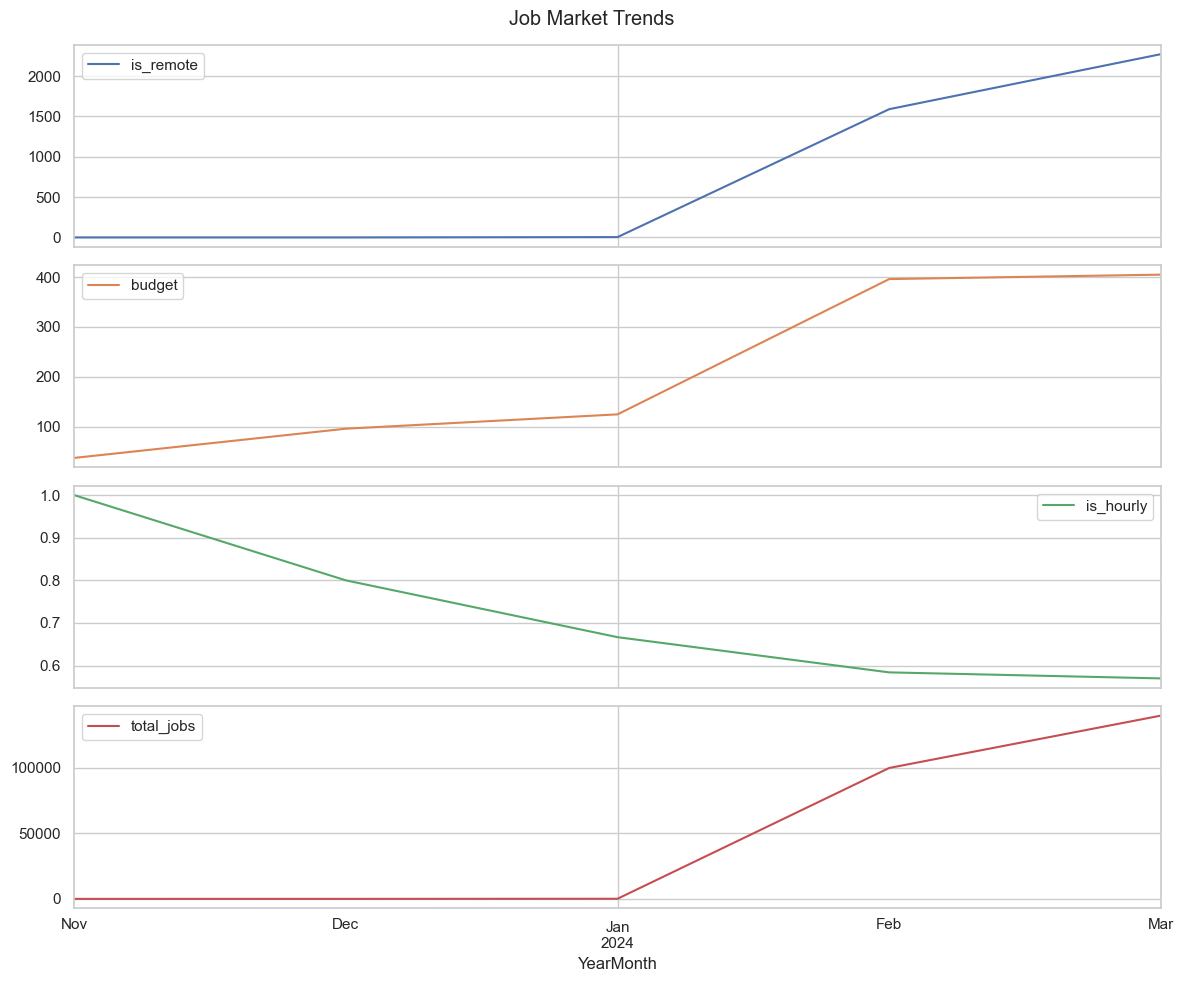

In [290]:
# Plot the trends
monthly_data.plot(subplots=True, figsize=(12, 10), title="Job Market Trends")
plt.tight_layout()
plt.show()

In [292]:
from statsmodels.tsa.seasonal import seasonal_decompose


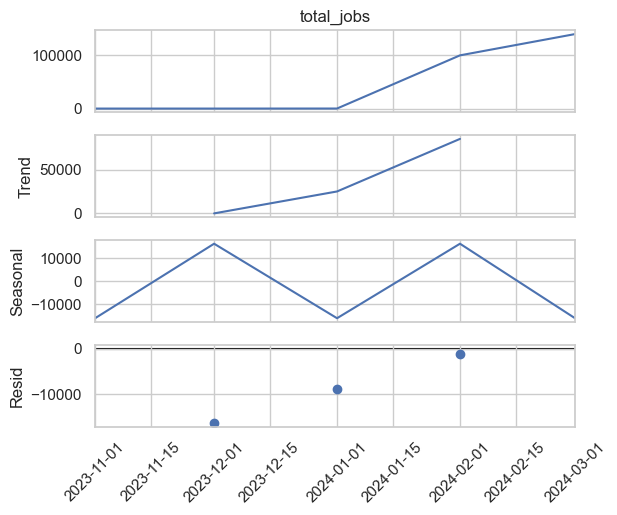

In [293]:
# Decompose the time series for total jobs
decomposition = seasonal_decompose(monthly_data['total_jobs'], model='additive', period=2)
decomposition.plot()
plt.xticks(rotation=45)
plt.show()

In [295]:
from statsmodels.tsa.arima.model import ARIMA

In [296]:
# ARIMA model for total jobs
arima_model = ARIMA(monthly_data['total_jobs'], order=(1, 1, 1))
arima_result = arima_model.fit()

c:\python\envs\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\python\envs\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\python\envs\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [297]:
# Predict future values
future_steps = 12  # Predict for the next year
forecast_arima = arima_result.forecast(steps=future_steps)
forecast_arima.index = pd.date_range(start=monthly_data.index[-1], periods=future_steps + 1, freq='M')[1:]

C:\Users\91860\AppData\Local\Temp\ipykernel_10568\2019652518.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_arima.index = pd.date_range(start=monthly_data.index[-1], periods=future_steps + 1, freq='M')[1:]


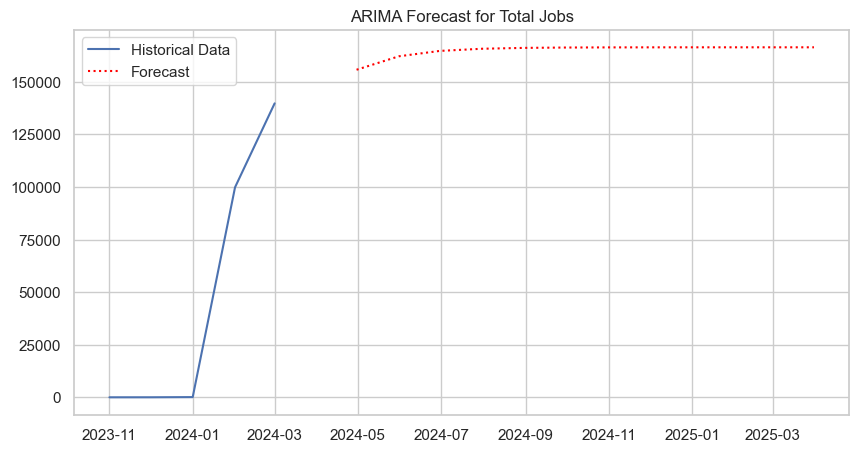

In [298]:
# Plot the forecast
plt.figure(figsize=(10, 5))
plt.plot(monthly_data['total_jobs'], label='Historical Data')
plt.plot(forecast_arima, label='Forecast', linestyle=':', color='red')  # Dotted line with red color
plt.title('ARIMA Forecast for Total Jobs')
plt.legend()
plt.show()

In [299]:
# Prepare data for Prophet
prophet_data = monthly_data.reset_index()[['YearMonth', 'is_remote']]
prophet_data.columns = ['ds', 'y']

In [300]:
# Initialize and fit Prophet model
prophet_model = Prophet()
prophet_model.fit(prophet_data)

11:41:24 - cmdstanpy - INFO - Chain [1] start processing
11:41:25 - cmdstanpy - INFO - Chain [1] done processing


In [301]:
# Create future dataframe
future_dates = prophet_model.make_future_dataframe(periods=future_steps, freq='M')
forecast_prophet = prophet_model.predict(future_dates)

c:\python\envs\venv\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


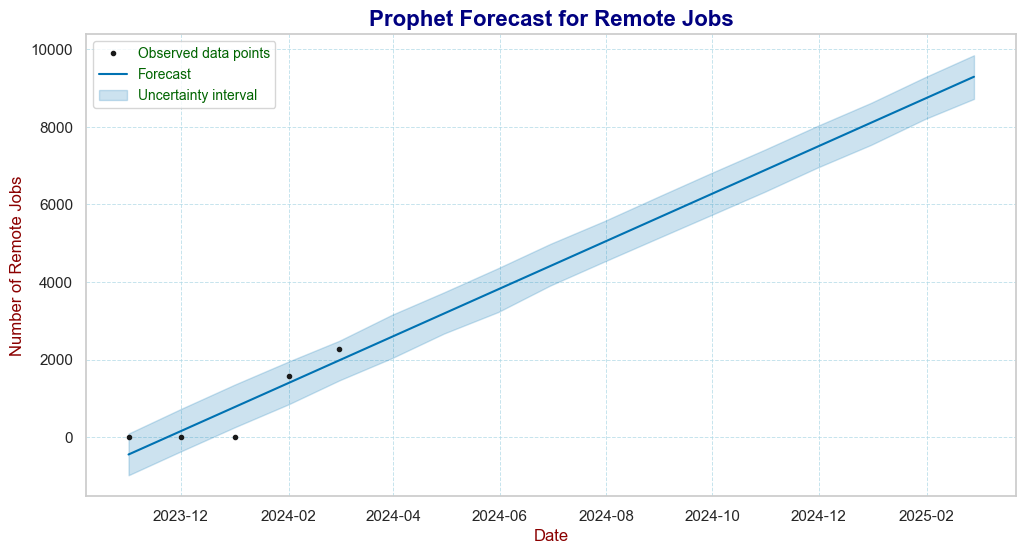

In [309]:
# Plot Prophet forecast with customized style and color changes
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)

# Plot the Prophet forecast with a custom color for the forecast line
prophet_model.plot(forecast_prophet, ax=ax)

# Customize the plot's style
ax.set_title('Prophet Forecast for Remote Jobs', fontsize=16, fontweight='bold', color='navy')
ax.set_xlabel('Date', fontsize=12, color='darkred')
ax.set_ylabel('Number of Remote Jobs', fontsize=12, color='darkred')
ax.grid(color='lightblue', linestyle='--', linewidth=0.7, alpha=0.7)

# Enhance legend appearance with a custom color
legend = ax.legend(loc='upper left', fontsize=10)
plt.setp(legend.get_texts(), color='darkgreen')

# Display the plot
plt.show()


In [303]:
# Evaluate ARIMA model
y_true = monthly_data['total_jobs'][-5:]  # Actual values from the last year
y_pred_arima = arima_result.predict(start=len(monthly_data) - 5, end=len(monthly_data) - 1)

In [306]:
from sklearn.metrics import mean_absolute_percentage_error


In [307]:
rmse_arima = np.sqrt(mean_squared_error(y_true, y_pred_arima))
mape_arima = mean_absolute_percentage_error(y_true, y_pred_arima)

print(f"ARIMA RMSE: {rmse_arima:.2f}")
print(f"ARIMA MAPE: {mape_arima:.2%}")

ARIMA RMSE: 44601.77
ARIMA MAPE: 74.35%


# Insights from ARIMA and Prophet Forecasts

1. Job opportunities are expected to steadily increase in the coming year, reflecting positive market trends.  
2. The adoption of remote work models continues to gain traction, emphasizing a shift towards flexible employment practices.  
3. Compensation levels appear to be stabilizing, with slight growth observed in roles driven by high demand.

# Recommendations

1. Organizations should prioritize building robust remote work capabilities, including technology upgrades and employee training.  
2. Job seekers are encouraged to focus on fields with growing demand, such as technology and healthcare, to maximize opportunities.  
3. Policymakers should promote reskilling and upskilling programs to ensure the workforce is prepared to meet future industry requirements.  
